# <a id='toc1_'></a>[Stress Detection From Wearables](#toc0_)

### <a id='toc1_1_1_'></a>[Imports](#toc0_)

In [11]:
import os
import pickle
import scipy.signal
from scipy import fft
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from synthesizers.preprocessing.wesad import WESADDataset
from typing import List, Tuple, Dict
from stress_detector.data.datatype import DataType

from stress_detector.preprocessing import load_data
from stress_detector.model import build_model, train, evaluate
from stress_detector import constants


from random import shuffle

### Data Loading

In [13]:
DATA_PATH = '/Users/nils/master/Stress-Detection-From-Wearables/data/WESAD'
SYNTHETIC_DGAN_DATA_PATH = '/Users/nils/thesis/gretel-synthetics/src/syn_df_30000_1hz'
# SYNTHETIC_DGAN_DATA_PATH = '/Users/nils/thesis/gretel-synthetics/src/syn_df_20720_1hz'
# SYNTHETIC_CGAN_DATA_PATH = 'data/syn/cond_syn_gen_54000.npy'
# SYNTHETIC_CGAN_DATA_PATH = 'data/syn/cgan/no_dp/5400.npy'
# SYNTHETIC_CGAN_DATA_PATH = 'data/syn/cgan/no_dp/5400_0.6785.npy'
SYNTHETIC_CGAN_DATA_PATH = 'data/syn/cgan/no_dp/5400_0.65625.npy'
DP_SYNTHETIC_CGAN_DATA_PATH = 'data/syn/cgan/dp/5400.npy'
# SYNTHETIC_DATA_PATH = "/Users/nils/thesis/gretel-synthetics/syn_df"
SAMPLING_RATE = 1

In [ ]:
all_subjects_X, all_subjects_y = load_data(DataType.CGAN, 1, synthetic_data_path=SYNTHETIC_CGAN_DATA_PATH)

In [ ]:
all_subjects_X, all_subjects_y = load_data(DataType.DGAN, 1, synthetic_data_path=SYNTHETIC_DGAN_DATA_PATH)

### <a id='toc1_3_3_'></a>[Train model](#toc0_)

![OS_Sensors](images/os_sensors.png)

![model_architecture](images/model_architecture.png)

In [5]:
print(len(all_subjects_y[15]))
count = 0
for i in all_subjects_y[15]:
    if i == 1:
        count += 1
print(count)

5399
2699


In [ ]:
train("E4", constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.DGAN, num_epochs=5000, with_loso=False)

In [8]:
# CGAN HIDDEN_SIZE 64
train("E4", constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.CGAN, num_epochs = 10, with_loso=False)




SmartwatchOS: E4
DataType: DataType.CGAN
DataType: <enum 'DataType'>
Signals: ACC_x ACC_y ACC_z TEMP EDA BVP
Number of signals: 6
BASE PATH: models/stress_detector/tstr
[0. 0. 1. 0. 1. 0. 1. 1. 0. 1.]
Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-06-06 15:54:44.079697: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-06 15:54:44.080445: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


data_type == DataType.DGAN: False
data_type == DataType.CGAN: True
MODEL PATH: models/stress_detector/tstr/syn/cgan/10/wesad.h5
Epoch 1/10


2023-06-06 15:54:44.432409: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-06 15:54:45.127169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


87/87 [==============================] - ETA: 0s - loss: 0.3467 - accuracy: 0.8465 - precision: 0.8452 - recall: 0.8435

2023-06-06 15:54:48.352872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


87/87 [==============================] - 4s 35ms/step - loss: 0.3467 - accuracy: 0.8465 - precision: 0.8452 - recall: 0.8435 - val_loss: 0.2286 - val_accuracy: 0.9259 - val_precision: 0.9257 - val_recall: 0.9231
Epoch 2/10
87/87 [==============================] - 2s 28ms/step - loss: 0.2210 - accuracy: 0.9148 - precision: 0.9119 - recall: 0.9136 - val_loss: 0.1797 - val_accuracy: 0.9500 - val_precision: 0.9465 - val_recall: 0.9509
Epoch 3/10
87/87 [==============================] - 2s 27ms/step - loss: 0.2013 - accuracy: 0.9275 - precision: 0.9256 - recall: 0.9271 - val_loss: 0.1676 - val_accuracy: 0.9537 - val_precision: 0.9563 - val_recall: 0.9528
Epoch 4/10
87/87 [==============================] - 2s 28ms/step - loss: 0.1918 - accuracy: 0.9317 - precision: 0.9321 - recall: 0.9317 - val_loss: 0.1425 - val_accuracy: 0.9565 - val_precision: 0.9556 - val_recall: 0.9565
Epoch 5/10
87/87 [==============================] - 2s 27ms/step - loss: 0.1758 - accuracy: 0.9384 - precision: 0.9381 

In [ ]:
# DP CGAN
train("E4", SIGNALS, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs = 1000, with_loso=False)

In [ ]:
# NEW CGAN DATASET TO COMPARE TO DP
train("E4", SIGNALS, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs = 1000, with_loso=False)

In [179]:
# CGAN DATASET size 53999
train("E4", SIGNALS, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs = 1000, with_loso=False)




SmartwatchOS: E4
DataType: DataType.CGAN
Signals: ACC_x ACC_y ACC_z TEMP EDA BVP
Number of signals: 6
Epoch 1/1000


2023-06-04 11:20:19.804929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1080/1080 [==============================] - 31s 26ms/step - loss: 0.1762 - accuracy: 0.9344 - precision: 0.9338 - recall: 0.9337
Epoch 2/1000
1080/1080 [==============================] - 26s 24ms/step - loss: 0.1156 - accuracy: 0.9612 - precision: 0.9608 - recall: 0.9609
Epoch 3/1000
1080/1080 [==============================] - 26s 24ms/step - loss: 0.0966 - accuracy: 0.9682 - precision: 0.9679 - recall: 0.9684
Epoch 4/1000
1080/1080 [==============================] - 26s 24ms/step - loss: 0.0895 - accuracy: 0.9715 - precision: 0.9717 - recall: 0.9713
Epoch 5/1000
1080/1080 [==============================] - 26s 24ms/step - loss: 0.0847 - accuracy: 0.9736 - precision: 0.9739 - recall: 0.9738
Epoch 6/1000
1080/1080 [==============================] - 27s 25ms/step - loss: 0.0835 - accuracy: 0.9757 - precision: 0.9755 - recall: 0.9757
Epoch 7/1000
1080/1080 [==============================] - 26s 24ms/step - loss: 0.0805 - accuracy: 0.9762 - precision: 0.9762 - recall: 0.9763
Epoch 8/1000

In [181]:
# for smart_os, signals in SMARTWATCH_OS.items():
train("E4", SIGNALS, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs = 500, with_loso=False)




SmartwatchOS: E4
DataType: DataType.CGAN
Signals: ACC_x ACC_y ACC_z TEMP EDA BVP
Number of signals: 6
Epoch 1/500


2023-06-04 12:28:00.141200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1080/1080 [==============================] - 31s 27ms/step - loss: 0.1807 - accuracy: 0.9340 - precision: 0.9331 - recall: 0.9340
Epoch 2/500
1080/1080 [==============================] - 27s 25ms/step - loss: 0.1208 - accuracy: 0.9606 - precision: 0.9606 - recall: 0.9603
Epoch 3/500
1080/1080 [==============================] - 26s 24ms/step - loss: 0.1003 - accuracy: 0.9673 - precision: 0.9675 - recall: 0.9669
Epoch 4/500
1080/1080 [==============================] - 26s 24ms/step - loss: 0.0884 - accuracy: 0.9711 - precision: 0.9710 - recall: 0.9708
Epoch 5/500
1080/1080 [==============================] - 27s 25ms/step - loss: 0.0833 - accuracy: 0.9737 - precision: 0.9737 - recall: 0.9736
Epoch 6/500
1080/1080 [==============================] - 26s 24ms/step - loss: 0.0809 - accuracy: 0.9748 - precision: 0.9747 - recall: 0.9749
Epoch 7/500
1080/1080 [==============================] - 26s 24ms/step - loss: 0.0801 - accuracy: 0.9761 - precision: 0.9762 - recall: 0.9758
Epoch 8/500
1080/1

## <a id='toc1_4_'></a>[Evaluation](#toc0_)

Evaluating every models on the corresponding test dataset not seen during training.

In [46]:
# CGAN DATASET size 53999
num_epochs = 1000
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}
for smart_os, signals in SMARTWATCH_OS.items():
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=True)

E4_CGAN
*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:14.999986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:16.101617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:16.987727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:17.822918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:18.699197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:20.241250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:21.087978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:21.888541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:22.700019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:23.508052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:24.330753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:25.120458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:25.940767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:26.805511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:30:27.924179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 1000 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 0.97059	0.97059		0.97059		0.97059
S3		 0.76471	0.76471		0.76471		0.76471
S4		 1.00000	1.00000		1.00000		1.00000
S5		 0.97143	0.97143		0.97143		0.97143
S6		 0.97143	0.97143		0.97143		0.97143
S7		 0.77143	0.77143		0.77143		0.77143
S8		 0.94286	0.94286		0.94286		0.94286
S9		 0.97143	0.97143		0.97143		0.97143
S10		 0.94444	0.94444		0.94444		0.94444
S11		 0.88889	0.88889		0.88889		0.88889
S13		 0.97222	0.97222		0.97222		0.97222
S14		 0.69444	0.69444		0.69444		0.69444
S15		 0.94444	0.94444		0.94444		0.94444
S16		 1.00000	1.00000		1.00000		1.00000
S17		 0.63889	0.63889		0.63889		0.63889
************************************************************************
Average		 0.89648	0.89648		0.89648		0.89648





In [35]:
# CGAN DATASET size 53999
num_epochs = 1000
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}
for smart_os, signals in SMARTWATCH_OS.items():
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=False)

E4_CGAN
*** Train on Synth, test on Real ***
DATATYPE: DataType.CGAN
LOADED: models/stress_detector/tstr/syn/cgan/1000/wesad.h5


2023-06-06 10:24:13.738779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 1000 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 0.97059	0.97059		0.97059		0.97059
S3		 0.76471	0.75758		0.73529		0.74627
S4		 0.94286	0.94286		0.94286		0.94286
S5		 0.85714	0.85714		0.85714		0.85714
S6		 0.91429	0.91176		0.88571		0.89855
S7		 0.57143	0.57143		0.57143		0.57143
S8		 0.91429	0.88889		0.91429		0.90141
S9		 0.97143	0.97059		0.94286		0.95652
S10		 0.97222	0.97222		0.97222		0.97222
S11		 0.77778	0.77778		0.77778		0.77778
S13		 0.86111	0.88571		0.86111		0.87324
S14		 0.50000	0.50000		0.47222		0.48571
S15		 0.83333	0.84211		0.88889		0.86486
S16		 0.97222	0.97222		0.97222		0.97222
S17		 0.52778	0.51351		0.52778		0.52055
************************************************************************
Average		 0.82341	0.82229		0.81949		0.82076





In [12]:
# CGAN DATASET size 53999
num_epochs = 1000
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}
for smart_os, signals in constants.SMARTWATCH_OS.items():
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=False)

E4_CGAN
*** Train on Synth, test on Real ***
DATATYPE: DataType.CGAN
LOADED: models/stress_detector/tstr/syn/cgan/1000/wesad.h5


2023-06-06 15:55:54.521262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 1000 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 0.97059	0.97059		0.97059		0.97059
S3		 0.76471	0.75758		0.73529		0.74627
S4		 0.94286	0.94286		0.94286		0.94286
S5		 0.85714	0.85714		0.85714		0.85714
S6		 0.91429	0.91176		0.88571		0.89855
S7		 0.57143	0.57143		0.57143		0.57143
S8		 0.91429	0.88889		0.91429		0.90141
S9		 0.97143	0.97059		0.94286		0.95652
S10		 0.97222	0.97222		0.97222		0.97222
S11		 0.77778	0.77778		0.77778		0.77778
S13		 0.86111	0.88571		0.86111		0.87324
S14		 0.50000	0.50000		0.47222		0.48571
S15		 0.83333	0.84211		0.88889		0.86486
S16		 0.97222	0.97222		0.97222		0.97222
S17		 0.52778	0.51351		0.52778		0.52055
************************************************************************
Average		 0.82341	0.82229		0.81949		0.82076





In [136]:
# CGAN DATASET size 53999
num_epochs = 1000
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}
for smart_os, signals in SMARTWATCH_OS.items():
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=False)

E4_CGAN
*** Train on Synth, test on Real ***
DATATYPE: DataType.CGAN
LOADED: models/stress_detector/tstr/syn/cgan/1000/wesad.h5


2023-06-06 10:17:19.900908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 1000 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 0.97059	0.97059		0.97059		0.97059
S3		 0.55882	0.54286		0.55882		0.55072
S4		 0.97143	0.97143		0.97143		0.97143
S5		 0.88571	0.88571		0.88571		0.88571
S6		 0.82857	0.76316		0.82857		0.79452
S7		 0.82857	0.83333		0.85714		0.84507
S8		 0.80000	0.80000		0.80000		0.80000
S9		 0.94286	0.94286		0.94286		0.94286
S10		 0.97222	0.97222		0.97222		0.97222
S11		 0.66667	0.67568		0.69444		0.68493
S13		 0.91667	0.91667		0.91667		0.91667
S14		 0.66667	0.68571		0.66667		0.67606
S15		 0.75000	0.75000		0.75000		0.75000
S16		 0.97222	0.97222		0.97222		0.97222
S17		 0.88889	0.89189		0.91667		0.90411
************************************************************************
Average		 0.84133	0.83829		0.84693		0.84247





In [130]:
# CGAN DATASET size 53999
num_epochs = 1000
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}
for smart_os, signals in SMARTWATCH_OS.items():
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=False)

E4_CGAN
*** Train on Synth, test on Real ***
DATATYPE: DataType.CGAN
LOADED: models/stress_detector/tstr/syn/cgan/1000/wesad.h5


2023-06-06 10:13:24.341642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 1000 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 0.91176	0.91176		0.91176		0.91176
S3		 0.58824	0.58824		0.58824		0.58824
S4		 0.88571	0.88571		0.88571		0.88571
S5		 0.77143	0.77143		0.77143		0.77143
S6		 0.88571	0.88571		0.88571		0.88571
S7		 0.82857	0.82857		0.82857		0.82857
S8		 0.77143	0.77143		0.77143		0.77143
S9		 0.91429	0.91429		0.91429		0.91429
S10		 0.97222	0.97222		0.97222		0.97222
S11		 0.75000	0.75000		0.75000		0.75000
S13		 0.88889	0.88889		0.88889		0.88889
S14		 0.63889	0.63889		0.63889		0.63889
S15		 0.69444	0.69444		0.69444		0.69444
S16		 0.88889	0.88889		0.88889		0.88889
S17		 0.75000	0.75000		0.75000		0.75000
************************************************************************
Average		 0.80937	0.80937		0.80937		0.80937





In [76]:
# CGAN DATASET size 53999
num_epochs = 1000
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}
for smart_os, signals in SMARTWATCH_OS.items():
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=False)

E4_CGAN
*** Train on Synth, test on Real ***
DATATYPE: DataType.CGAN
LOADED: models/stress_detector/tstr/syn/cgan/1000/wesad.h5


2023-06-06 09:50:44.491354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 1000 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 0.85294	0.85294		0.85294		0.85294
S3		 0.73529	0.73529		0.73529		0.73529
S4		 0.97143	0.94444		0.97143		0.95775
S5		 0.82857	0.82857		0.82857		0.82857
S6		 0.77143	0.77143		0.77143		0.77143
S7		 0.91429	0.91429		0.91429		0.91429
S8		 0.82857	0.82857		0.82857		0.82857
S9		 0.91429	0.91429		0.91429		0.91429
S10		 0.97222	0.97222		0.97222		0.97222
S11		 0.83333	0.83333		0.83333		0.83333
S13		 0.83333	0.83333		0.83333		0.83333
S14		 0.55556	0.54054		0.55556		0.54795
S15		 0.69444	0.69444		0.69444		0.69444
S16		 0.94444	0.94444		0.94444		0.94444
S17		 0.80556	0.80556		0.80556		0.80556
************************************************************************
Average		 0.83038	0.82758		0.83038		0.82896





In [180]:
# CGAN DATASET size 53999
num_epochs = 1000
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}
for smart_os, signals in SMARTWATCH_OS.items():
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=False)

E4_CGAN
*** Train on Synth, test on Real ***
DATATYPE: DataType.CGAN
LOADED: models/stress_detector/tstr/syn/cgan/1000/wesad.h5


2023-06-04 12:27:26.720200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 1000 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 0.97059	0.97059		0.97059		0.97059
S3		 0.79412	0.79412		0.79412		0.79412
S4		 1.00000	1.00000		1.00000		1.00000
S5		 0.82857	0.82857		0.82857		0.82857
S6		 0.88571	0.88571		0.88571		0.88571
S7		 0.54286	0.54286		0.54286		0.54286
S8		 0.85714	0.85714		0.85714		0.85714
S9		 0.82857	0.82857		0.82857		0.82857
S10		 0.94444	0.94444		0.94444		0.94444
S11		 0.63889	0.63889		0.63889		0.63889
S13		 0.86111	0.86111		0.86111		0.86111
S14		 0.58333	0.58333		0.58333		0.58333
S15		 0.75000	0.75000		0.75000		0.75000
S16		 1.00000	1.00000		1.00000		1.00000
S17		 0.55556	0.55556		0.55556		0.55556
************************************************************************
Average		 0.80273	0.80273		0.80273		0.80273





In [175]:
num_epochs = 5000
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}
for smart_os, signals in SMARTWATCH_OS.items():
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=False)

E4_CGAN
*** Train on Synth, test on Real ***
DATATYPE: DataType.CGAN
LOADED: models/stress_detector/tstr/syn/cgan/5000/wesad.h5


2023-06-04 11:01:25.462580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 5000 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 1.00000	1.00000		1.00000		1.00000
S3		 0.79412	0.79412		0.79412		0.79412
S4		 1.00000	1.00000		1.00000		1.00000
S5		 1.00000	1.00000		1.00000		1.00000
S6		 1.00000	1.00000		1.00000		1.00000
S7		 0.74286	0.73529		0.71429		0.72464
S8		 0.85714	0.85714		0.85714		0.85714
S9		 0.97143	0.97143		0.97143		0.97143
S10		 0.91667	0.91667		0.91667		0.91667
S11		 0.80556	0.80556		0.80556		0.80556
S13		 0.88889	0.88889		0.88889		0.88889
S14		 0.69444	0.69444		0.69444		0.69444
S15		 0.83333	0.83333		0.83333		0.83333
S16		 1.00000	1.00000		1.00000		1.00000
S17		 0.77778	0.77778		0.77778		0.77778
************************************************************************
Average		 0.88548	0.88498		0.88358		0.88427





In [146]:
num_epochs = 10000
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}
for smart_os, signals in SMARTWATCH_OS.items():
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=False)

E4_CGAN
*** Train on Synth, test on Real ***
DATATYPE: DataType.CGAN
LOADED: models/stress_detector/tstr/syn/cgan/10000/wesad.h5


2023-06-03 20:39:37.064616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 10000 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 0.97059	0.97059		0.97059		0.97059
S3		 0.67647	0.67647		0.67647		0.67647
S4		 1.00000	1.00000		1.00000		1.00000
S5		 0.88571	0.88571		0.88571		0.88571
S6		 0.91429	0.91429		0.91429		0.91429
S7		 0.42857	0.42857		0.42857		0.42857
S8		 0.80000	0.80000		0.80000		0.80000
S9		 0.77143	0.77143		0.77143		0.77143
S10		 0.94444	0.94444		0.94444		0.94444
S11		 0.58333	0.58333		0.58333		0.58333
S13		 0.77778	0.77778		0.77778		0.77778
S14		 0.55556	0.57143		0.55556		0.56338
S15		 0.80556	0.80556		0.80556		0.80556
S16		 1.00000	1.00000		1.00000		1.00000
S17		 0.41667	0.41667		0.41667		0.41667
************************************************************************
Average		 0.76869	0.76975		0.76869		0.76921





In [144]:
num_epochs = 1000
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}
for smart_os, signals in SMARTWATCH_OS.items():
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=False)

E4_CGAN
*** Train on Synth, test on Real ***
DATATYPE: DataType.CGAN
LOADED: models/stress_detector/tstr/syn/cgan/1000/wesad.h5


2023-06-03 20:23:40.751113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 1000 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 1.00000	1.00000		1.00000		1.00000
S3		 0.79412	0.79412		0.79412		0.79412
S4		 0.97143	0.97143		0.97143		0.97143
S5		 1.00000	1.00000		1.00000		1.00000
S6		 0.91429	0.91429		0.91429		0.91429
S7		 0.82857	0.82857		0.82857		0.82857
S8		 0.88571	0.88571		0.88571		0.88571
S9		 0.85714	0.85714		0.85714		0.85714
S10		 0.94444	0.91892		0.94444		0.93151
S11		 0.72222	0.72222		0.72222		0.72222
S13		 0.97222	0.97222		0.97222		0.97222
S14		 0.44444	0.44444		0.44444		0.44444
S15		 0.94444	0.94444		0.94444		0.94444
S16		 0.97222	0.97222		0.97222		0.97222
S17		 0.77778	0.77778		0.77778		0.77778
************************************************************************
Average		 0.86860	0.86690		0.86860		0.86774





In [182]:
num_epochs = 500
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}
for smart_os, signals in SMARTWATCH_OS.items():
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=False)

E4_CGAN
*** Train on Synth, test on Real ***
DATATYPE: DataType.CGAN
LOADED: models/stress_detector/tstr/syn/cgan/500/wesad.h5


2023-06-04 13:45:46.264457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 500 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 1.00000	1.00000		1.00000		1.00000
S3		 0.79412	0.80000		0.82353		0.81159
S4		 1.00000	1.00000		1.00000		1.00000
S5		 1.00000	1.00000		1.00000		1.00000
S6		 1.00000	1.00000		1.00000		1.00000
S7		 0.60000	0.60000		0.60000		0.60000
S8		 0.82857	0.82857		0.82857		0.82857
S9		 0.97143	0.97143		0.97143		0.97143
S10		 0.91667	0.91667		0.91667		0.91667
S11		 0.77778	0.77778		0.77778		0.77778
S13		 0.97222	0.97143		0.94444		0.95775
S14		 0.58333	0.59459		0.61111		0.60274
S15		 0.86111	0.85714		0.83333		0.84507
S16		 1.00000	1.00000		1.00000		1.00000
S17		 0.58333	0.58333		0.58333		0.58333
************************************************************************
Average		 0.85924	0.86006		0.85935		0.85966





In [51]:
num_epochs = 1000
# Evaluating every models on the corresponding test dataset not seen during training.
os_scores_acc = {}
os_scores_f1 = {}

for smart_os, signals in SMARTWATCH_OS.items():
    
    if  smart_os == "E4_CGAN":
        print(smart_os)
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.CGAN, num_epochs=num_epochs, with_loso=True)
    #if  smart_os == "E4_DGAN":
    #    print(smart_os)
    #    evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.DGAN, num_epochs=num_epochs)
    if smart_os == "E4":
        print("E4")
        evaluate(os_scores_acc, os_scores_f1, smart_os, signals, all_subjects_X, all_subjects_y, DataType.REAL, num_epochs=100)

E4
*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:01.490767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:02.976755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:04.125642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:05.074072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:06.071872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:07.179540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:08.840911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:09.965025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:10.980441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:12.083760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:13.131027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:14.211907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:15.230998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:17.264055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:18.560491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4
Evaluation of CNN model trained on 100 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 0.97059	0.97059		0.97059		0.97059
S3		 0.82353	0.81818		0.79412		0.80597
S4		 0.97143	0.97143		0.97143		0.97143
S5		 1.00000	1.00000		1.00000		1.00000
S6		 0.94286	0.94286		0.94286		0.94286
S7		 0.94286	0.94286		0.94286		0.94286
S8		 0.94286	0.97059		0.94286		0.95652
S9		 1.00000	1.00000		1.00000		1.00000
S10		 0.97222	0.97143		0.94444		0.95775
S11		 0.80556	0.80000		0.77778		0.78873
S13		 0.97222	0.97222		0.97222		0.97222
S14		 0.27778	0.27778		0.27778		0.27778
S15		 0.97222	0.97222		0.97222		0.97222
S16		 1.00000	1.00000		1.00000		1.00000
S17		 0.66667	0.66667		0.66667		0.66667
************************************************************************
Average		 0.88405	0.88512		0.87839		0.88171



E4_CGAN
*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:19.728020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:20.906845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:21.854095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:22.988822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:24.093785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:25.302388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:27.018771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:28.158659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:29.198597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:30.261590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:31.294239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:32.294349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:33.370956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:34.773860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


*** Evaluate using 'Leave One Subject Out'-Method ***


2023-06-06 11:39:35.882351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Smartwatch OS: E4_CGAN
Evaluation of CNN model trained on 1000 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 0.97059	0.97059		0.97059		0.97059
S3		 0.76471	0.76471		0.76471		0.76471
S4		 1.00000	1.00000		1.00000		1.00000
S5		 0.97143	0.97143		0.97143		0.97143
S6		 0.97143	0.97143		0.97143		0.97143
S7		 0.77143	0.77143		0.77143		0.77143
S8		 0.94286	0.94286		0.94286		0.94286
S9		 0.97143	0.97143		0.97143		0.97143
S10		 0.94444	0.94444		0.94444		0.94444
S11		 0.88889	0.88889		0.88889		0.88889
S13		 0.97222	0.97222		0.97222		0.97222
S14		 0.69444	0.69444		0.69444		0.69444
S15		 0.94444	0.94444		0.94444		0.94444
S16		 1.00000	1.00000		1.00000		1.00000
S17		 0.63889	0.63889		0.63889		0.63889
************************************************************************
Average		 0.89648	0.89648		0.89648		0.89648





In [53]:
groups_set = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

df_os_scores_acc = pd.DataFrame(os_scores_acc)
replacements = {l1:f'S{l2}' for l1, l2 in zip(groups_set, subject_ids)}
df_os_scores_acc = df_os_scores_acc.rename(replacements)
df_os_scores_acc.to_csv('os_scores_acc.csv')

In [54]:
df_os_scores_f1 = pd.DataFrame(os_scores_f1)
replacements = {l1:f'S{l2}' for l1, l2 in zip(groups_set, subject_ids)}
df_os_scores_f1 = df_os_scores_f1.rename(replacements)
df_os_scores_f1.to_csv('os_scores_f1.csv')

<AxesSubplot: title={'center': 'Accuracy of different os models on each subject'}>

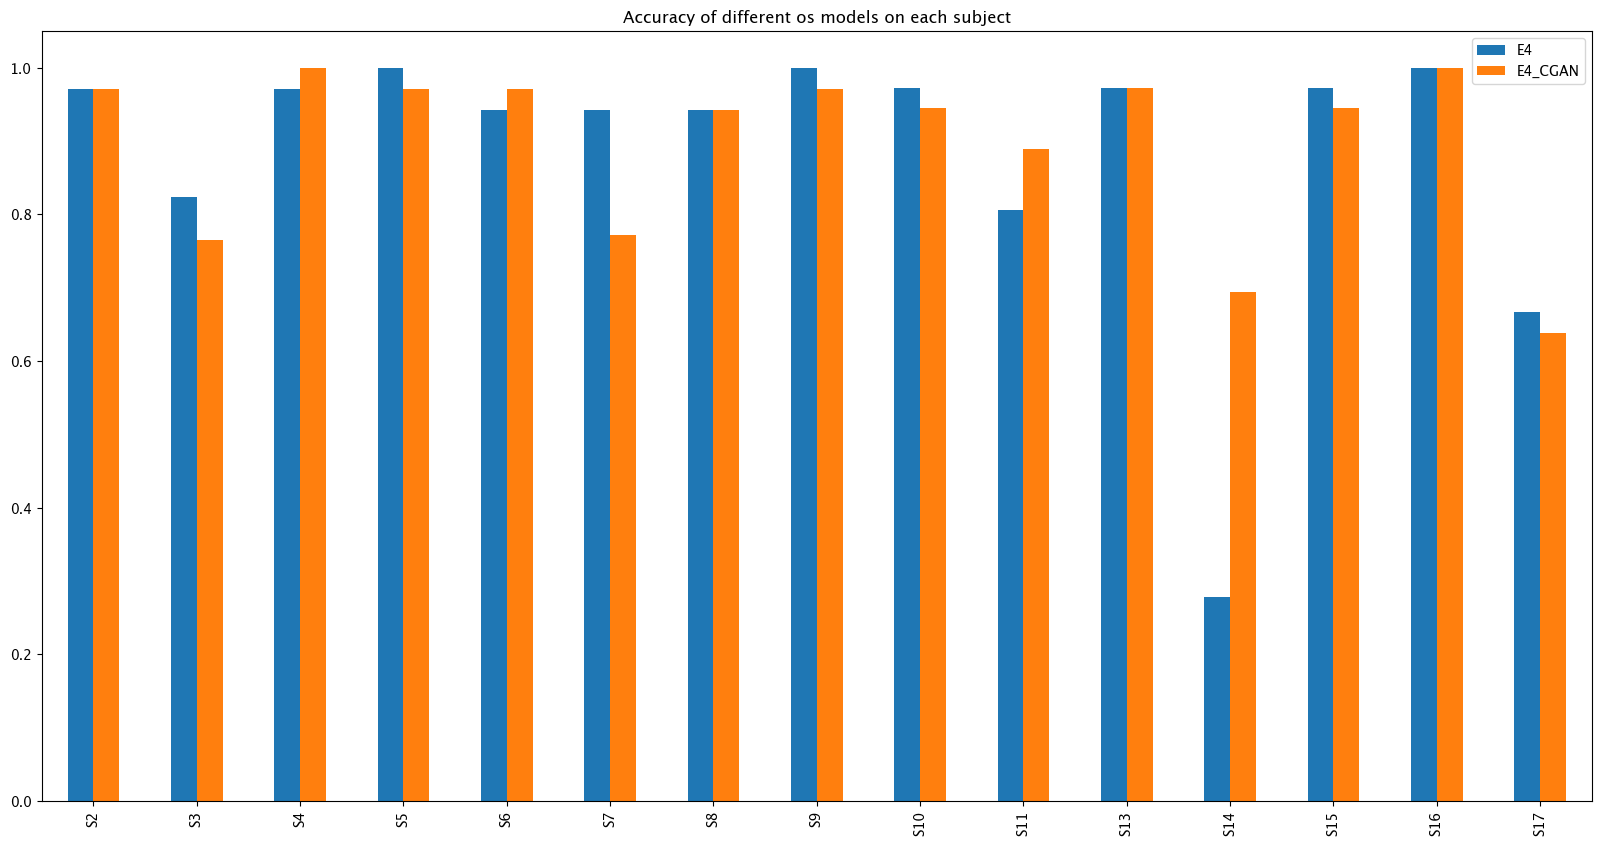

In [60]:
df_os_scores_acc.plot.bar(figsize=(20,10), title='Accuracy of different os models on each subject')

<AxesSubplot: title={'center': 'F1-Score of different os models on each subject'}>

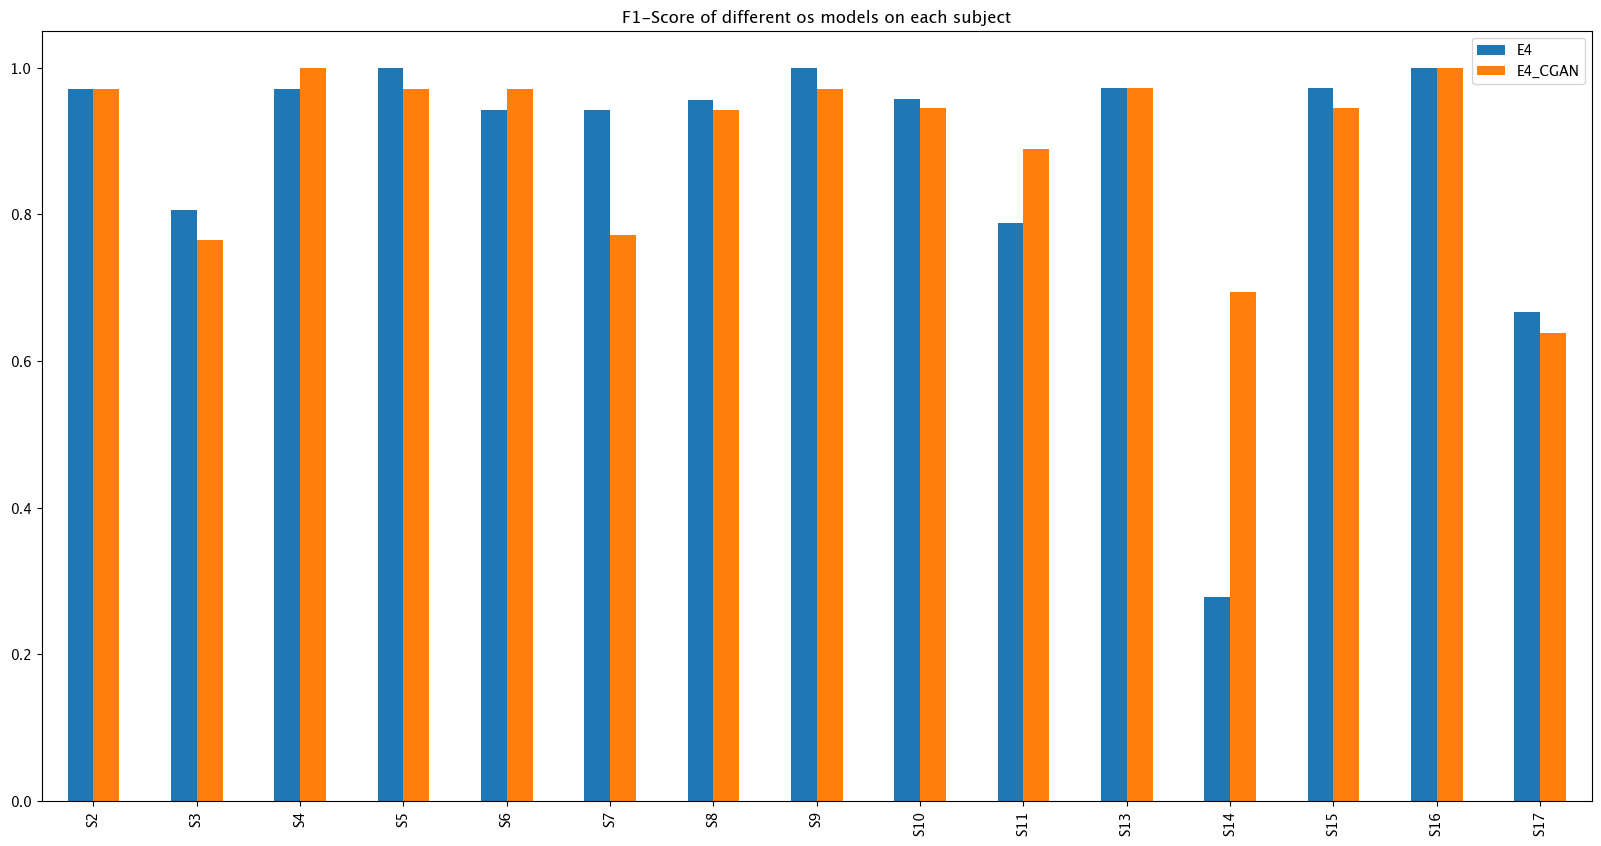

In [59]:
df_os_scores_f1.plot.bar(figsize=(20,10), title='F1-Score of different os models on each subject')

           E4   E4_CGAN
S2   0.970588  0.970588
S3   0.823529  0.764706
S4   0.971429  1.000000
S5   1.000000  0.971429
S6   0.942857  0.971429
S7   0.942857  0.771429
S8   0.942857  0.942857
S9   1.000000  0.971429
S10  0.972222  0.944444
S11  0.805556  0.888889
S13  0.972222  0.972222
S14  0.277778  0.694444
S15  0.972222  0.944444
S16  1.000000  1.000000
S17  0.666667  0.638889

E4         0.884052
E4_CGAN    0.896480
dtype: float64



Text(0.5, 1.0, 'Average accuracy of different models on each OS')

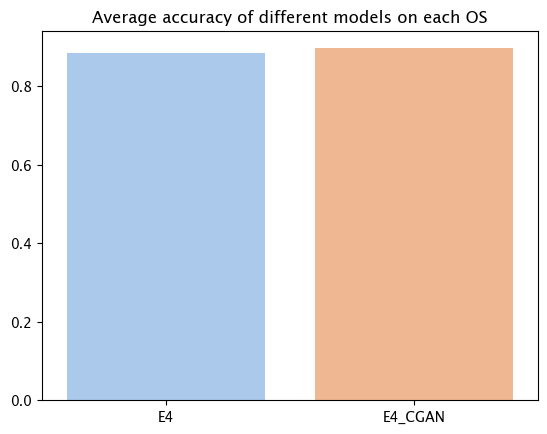

In [58]:
# bar plot of the accuracy of the different loso models
print(f'{df_os_scores_acc}\n')
print(f'{df_os_scores_acc.mean()}\n')
sns.barplot(x=df_os_scores_acc.keys(), y=df_os_scores_acc.mean(), palette='pastel').set_title(label='Average accuracy of different models on each OS')

           E4   E4_CGAN
S2   0.970588  0.970588
S3   0.805970  0.764706
S4   0.971429  1.000000
S5   1.000000  0.971429
S6   0.942857  0.971429
S7   0.942857  0.771429
S8   0.956522  0.942857
S9   1.000000  0.971429
S10  0.957746  0.944444
S11  0.788732  0.888889
S13  0.972222  0.972222
S14  0.277778  0.694444
S15  0.972222  0.944444
S16  1.000000  1.000000
S17  0.666667  0.638889

E4         0.881706
E4_CGAN    0.896480
dtype: float64



Text(0.5, 1.0, 'F1 score of different models on each OS')

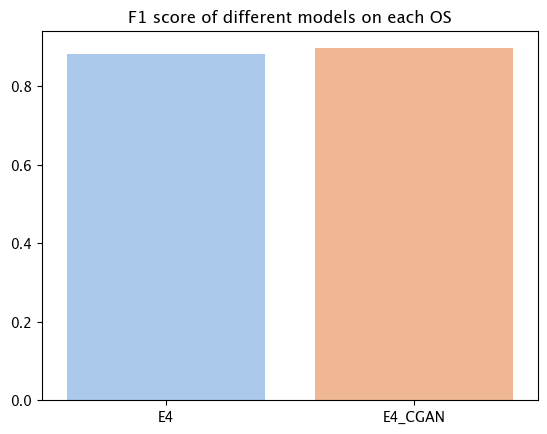

In [61]:
# bar plot of the accuracy of the different loso models
print(f'{df_os_scores_f1}\n')
print(f'{df_os_scores_f1.mean()}\n')
sns.barplot(x=df_os_scores_f1.keys(), y=df_os_scores_f1.mean(), palette='pastel').set_title(label='F1 score of different models on each OS')

## <a id='toc1_5_'></a>[Prediction](#toc0_)

In [ ]:
model_path = "./models/E4/wesad_E4_binary_s10_100.h5"
model = tf.keras.models.load_model(model_path)
predictions = model.predict(X_test) # make predictions on the test set using the trained model
pred_class = np.argmax(predictions, axis=-1) # get the class with the highest probability

In [ ]:
true_classified = 0
for i in range(len(pred_class)):
    print("Prediction: ", predictions[i])
    print("Prediction: ", pred_class[i])
    ground_truth = max(enumerate(y_test[i]),key=lambda x: x[1])[0]
    print("Ground Truth: ", ground_truth)
    print()
    if ground_truth == pred_class[i]:
        true_classified += 1
print("Accuracy: ", true_classified/len(pred_class))
    

In [294]:
df_os_scores_acc = pd.DataFrame(os_scores_acc)
replacements = {l1:f'S{l2}' for l1, l2 in zip(groups_set, subject_ids)}
df_os_scores_acc = df_os_scores_acc.rename(replacements)
df_os_scores_acc.to_csv('os_scores_acc.csv')